In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

from tensorflow.keras.models import model_from_json

In [100]:
df_final = pd.read_csv(r"C:\Users\Udhayakuamar\Desktop\Des- data\Internship dataset\VMC_data.csv",na_values=['null'],index_col='date',parse_dates=True,infer_datetime_format=True)
df_final.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,55.51,56.1498,55.51,56.08,394639,VMC
2013-02-11,55.97,56.2899,55.64,55.65,214019,VMC
2013-02-12,55.57,56.6500,55.55,56.12,732280,VMC
2013-02-13,56.29,56.4700,55.75,55.86,751033,VMC
2013-02-14,55.46,55.4999,52.79,54.87,1673716,VMC


In [101]:
df_final.drop(df_final.columns[[5]], axis=1, inplace=True)
df_final.head()

,open,high,low,close,volume
date,,,,,
2013-02-08,55.51,56.1498,55.51,56.08,394639
2013-02-11,55.97,56.2899,55.64,55.65,214019
2013-02-12,55.57,56.6500,55.55,56.12,732280
2013-02-13,56.29,56.4700,55.75,55.86,751033
2013-02-14,55.46,55.4999,52.79,54.87,1673716


In [102]:
df_final.shape

(1259, 5)

<AxesSubplot:xlabel='date'>

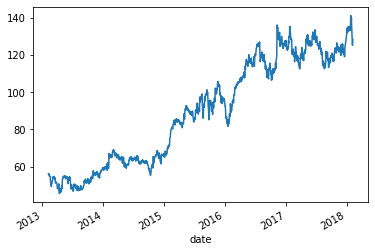

In [103]:
df_final['close'].plot()

In [104]:
test = df_final
# Target column
target = pd.DataFrame(test['close'])
display(test.head())

,open,high,low,close,volume
date,,,,,
2013-02-08,55.51,56.1498,55.51,56.08,394639
2013-02-11,55.97,56.2899,55.64,55.65,214019
2013-02-12,55.57,56.6500,55.55,56.12,732280
2013-02-13,56.29,56.4700,55.75,55.86,751033
2013-02-14,55.46,55.4999,52.79,54.87,1673716


In [105]:
feature_columns = ['open', 'high', 'low', 'volume']

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,open,high,low,volume
date,,,,
2013-02-08,0.097826,0.103036,0.108349,0.035000
2013-02-11,0.102680,0.104514,0.109745,0.000000
2013-02-12,0.098459,0.108311,0.108779,0.100426
2013-02-13,0.106057,0.106413,0.110926,0.104060
2013-02-14,0.097298,0.096182,0.079141,0.282852


In [107]:
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target.shape)

Shape of features :  (1259, 4)
Shape of target :  (1259, 1)


In [108]:
target = target.shift(-1)
validation_y = target[-100:-1]
target = target[:-100]

In [109]:
validation_X = feature_minmax_transform[-100:-1]
feature_minmax_transform = feature_minmax_transform[:-100]
display(validation_X.tail())
display(validation_y.tail())

,open,high,low,volume
date,,,,
2018-01-31,0.994618,0.992512,0.937718,0.382984
2018-02-01,0.932566,0.955073,0.950336,0.365627
2018-02-02,0.914521,0.922485,0.908134,0.319248
2018-02-05,0.885289,0.895486,0.833826,0.419908
2018-02-06,0.811418,0.867750,0.830282,0.296980


,close
date,
2018-01-31,134.23
2018-02-01,131.00
2018-02-02,125.20
2018-02-05,126.78
2018-02-06,128.24


In [110]:
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target.shape)
display(target.tail())

Shape of features :  (1159, 4)
Shape of target :  (1159, 1)


,close
date,
2017-09-08,117.00
2017-09-11,118.00
2017-09-12,117.02
2017-09-13,114.54
2017-09-14,113.21


## Splitting into training and testing sets

In [111]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target[:len(train_index)].values.ravel(), target[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [112]:
X_train.shape

(1054, 4)

In [113]:
X_train

,open,high,low,volume
date,,,,
2013-02-08,0.097826,0.103036,0.108349,0.035000
2013-02-11,0.102680,0.104514,0.109745,0.000000
2013-02-12,0.098459,0.108311,0.108779,0.100426
2013-02-13,0.106057,0.106413,0.110926,0.104060
2013-02-14,0.097298,0.096182,0.079141,0.282852
...,...,...,...,...
2017-04-10,0.818067,0.816073,0.811597,0.245468
2017-04-11,0.787674,0.793820,0.788940,0.131711
2017-04-12,0.788096,0.786121,0.771866,0.194435


In [114]:
y_train.shape

(1054,)

In [115]:
y_train

array([ 55.65,  56.12,  55.86, ..., 117.28, 118.19, 116.9 ])

In [116]:
X_test.shape

(105, 4)

In [117]:
X_test

,open,high,low,volume
date,,,,
2017-04-18,0.752849,0.758912,0.761879,0.104432
2017-04-19,0.754749,0.764818,0.767893,0.121645
2017-04-20,0.757070,0.781903,0.776805,0.112338
2017-04-21,0.777543,0.790656,0.793128,0.189803
2017-04-24,0.800760,0.805632,0.816430,0.147337
...,...,...,...,...
2017-09-08,0.777121,0.793293,0.789937,0.166229
2017-09-11,0.788940,0.791043,0.767463,0.241367
2017-09-12,0.752322,0.761021,0.769933,0.138193


In [118]:
y_test.shape

(105,)

In [119]:

y_test


array([117.41, 119.83, 120.97, 122.02, 121.45, 120.73, 122.8 , 120.88,
       123.35, 128.45, 127.59, 128.34, 127.74, 126.67, 126.11, 130.63,
       129.04, 128.25, 130.71, 128.33, 124.9 , 126.06, 125.95, 126.93,
       126.65, 125.12, 127.75, 126.43, 125.05, 124.65, 126.83, 126.26,
       125.91, 125.16, 126.71, 128.34, 130.33, 129.91, 132.26, 129.21,
       128.64, 129.38, 130.24, 129.54, 128.17, 129.34, 132.23, 133.48,
       131.38, 130.2 , 127.01, 126.68, 127.14, 130.  , 129.45, 128.17,
       125.92, 125.09, 126.16, 125.33, 124.96, 124.68, 123.03, 125.47,
       125.3 , 126.19, 126.5 , 127.1 , 125.65, 124.04, 124.  , 123.12,
       121.84, 123.12, 120.15, 121.84, 120.82, 118.39, 117.88, 114.71,
       114.2 , 115.17, 116.61, 116.09, 114.11, 113.97, 112.57, 115.16,
       114.63, 114.34, 113.13, 115.94, 116.5 , 121.86, 121.26, 121.2 ,
       118.14, 119.05, 119.73, 121.52, 117.  , 118.  , 117.02, 114.54,
       113.21])

## Processing the data

In [120]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

## Model

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM

In [122]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
132/132 [==============================] - 2s 1ms/step - loss: 7413.2329
Epoch 2/200
132/132 [==============================] - 0s 2ms/step - loss: 7168.0190
Epoch 3/200
132/132 [==============================] - 0s 2ms/step - loss: 6702.5410
Epoch 4/200
132/132 [==============================] - 0s 2ms/step - loss: 6017.1831
Epoch 5/200
132/132 [==============================] - 0s 1ms/step - loss: 5178.2861
Epoch 6/200
132/132 [==============================] - 0s 1ms/step - loss: 4272.6318
Epoch 7/200
132/132 [==============================] - 0s 1ms/step - loss: 3377.2773
Epoch 8/200
132/132 [==============================] - 0s 2ms/step - loss: 2551.5991
Epoch 9/200
132/132 [==============================] - 0s 2ms/step - loss: 1836.4802
Epoch 10/200
132/132 [==============================] - 0s 2ms/step - loss: 1254.6968
Epoch 11/200
132/132 [==============================] - 0s 1ms/step - loss: 811.8215
Epoch 12/200
132/132 [==============================] - 0s 1ms/s

132/132 [==============================] - 0s 2ms/step - loss: 2.9483
Epoch 99/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9463
Epoch 100/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9445
Epoch 101/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9428
Epoch 102/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9413A: 0s - loss: 2.406
Epoch 103/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9398
Epoch 104/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9384
Epoch 105/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9371
Epoch 106/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9359
Epoch 107/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9348
Epoch 108/200
132/132 [==============================] - 0s 2ms/step - loss: 2.9337
Epoch 109/200
132/132 [==============================] - 0s 1ms/step - l

In [123]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.996
The R2 score on the Test set is:	0.855


In [124]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

105/105 [==============================] - 0s 755us/step - loss: 4.0085


In [125]:
print('LSTM: %f'%score_lstm)

LSTM: 4.008532


In [126]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

## Plotting the predictions

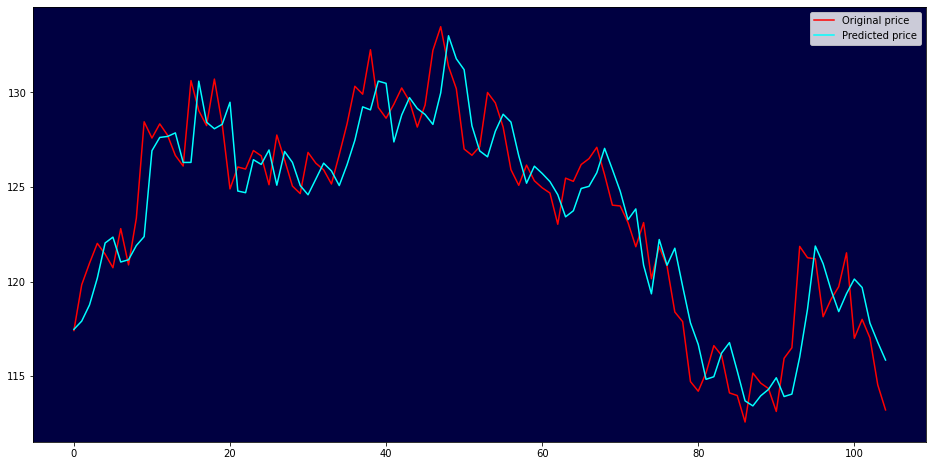

In [127]:
predictions = y_pred_test_LSTM
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [128]:
model_json = model_lstm.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_lstm.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [129]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
#json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [130]:
loaded_model.compile(loss='mean_squared_error', optimizer='adam')

In [131]:

score= loaded_model.evaluate(X_tst_t, y_test, batch_size=1)

105/105 [==============================] - 0s 769us/step - loss: 4.0085


In [132]:
score

4.0085320472717285